In [1]:
from feature_engineering import perform_feature_engineering
from cleaning_preprocessing import preprocess_data ,clean_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
df= pd.read_csv('churn.csv')
data= df.copy()
preprocessed_data= preprocess_data(data)
engineered_data= perform_feature_engineering(preprocessed_data)
engineered_data['gender_mapped'] = engineered_data['gender'].map({0: 'Female', 1: 'Male'})
engineered_data['gender'] = engineered_data['gender'].map({0: 'Female', 1: 'Male'})
engineered_data['Churn_Label'] = engineered_data['churn_risk_score'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')

C:\Users\Kamal\AppData\Local\Temp\ipykernel_21068\2810881893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=engineered_data, x='churn_risk_score', palette='Set2')


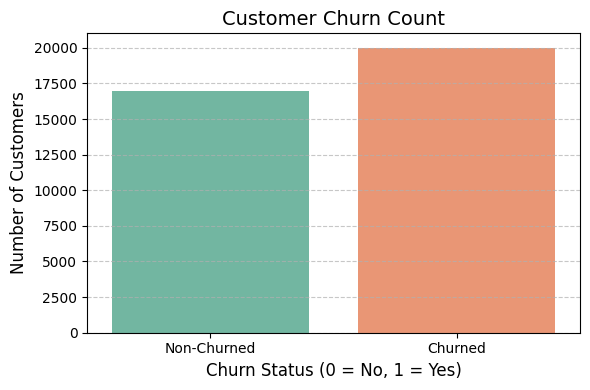

In [4]:
# 1.Bar plot: Churned vs. Non-Churned
plt.figure(figsize=(6, 4))
sns.countplot(data=engineered_data, x='churn_risk_score', palette='Set2')
plt.title('Customer Churn Count', fontsize=14)
plt.xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


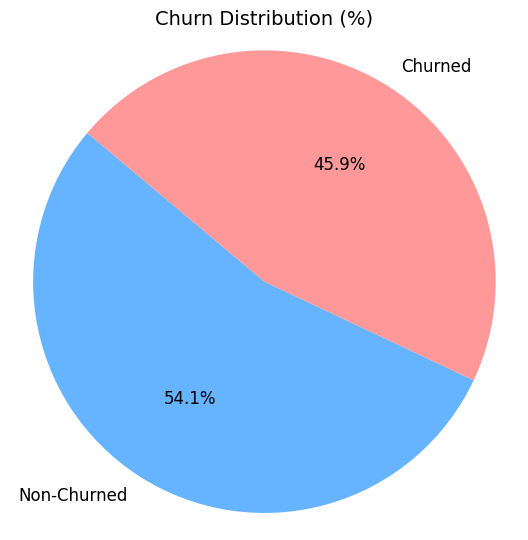

In [5]:
# 2.Pie chart: Churn proportion
churn_counts = engineered_data['churn_risk_score'].value_counts()
labels = ['Non-Churned', 'Churned']
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(5.5, 5.5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Churn Distribution (%)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

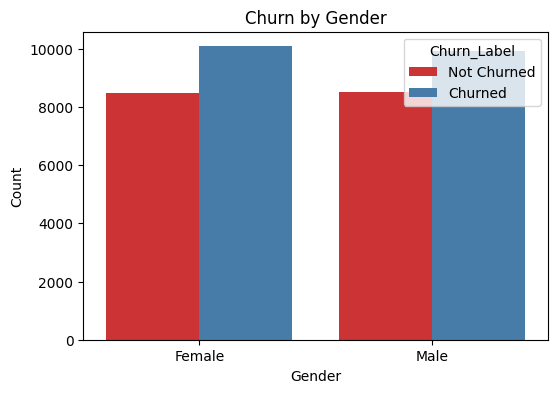

In [6]:
# 3. Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn_Label', data=engineered_data, palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\Kamal\AppData\Local\Temp\ipykernel_21068\1196977062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='avg_transaction_value', data=engineered_data, palette='Set3')


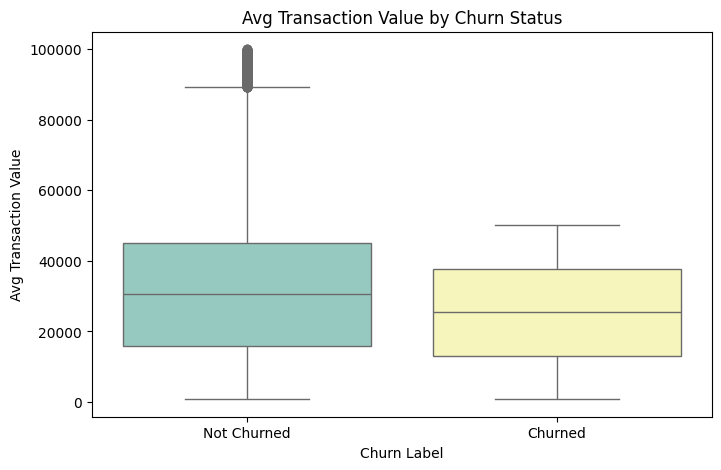

In [7]:
#4.Box Plot – Average Transaction Value by Churn Label
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_Label', y='avg_transaction_value', data=engineered_data, palette='Set3')
plt.title('Avg Transaction Value by Churn Status')
plt.xlabel('Churn Label')
plt.ylabel('Avg Transaction Value')
plt.show()


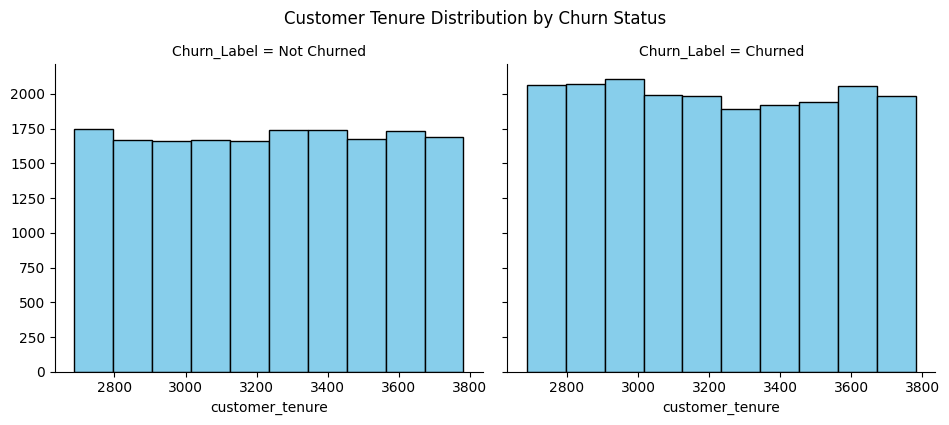

In [8]:
# 5.Histogram (FacetGrid) – Customer Tenure Distribution by Churn
g = sns.FacetGrid(engineered_data, col='Churn_Label', height=4, aspect=1.2)
g.map(plt.hist, 'customer_tenure', bins=10, color='skyblue', edgecolor='black')
g.fig.suptitle('Customer Tenure Distribution by Churn Status', y=1.05)
plt.show()

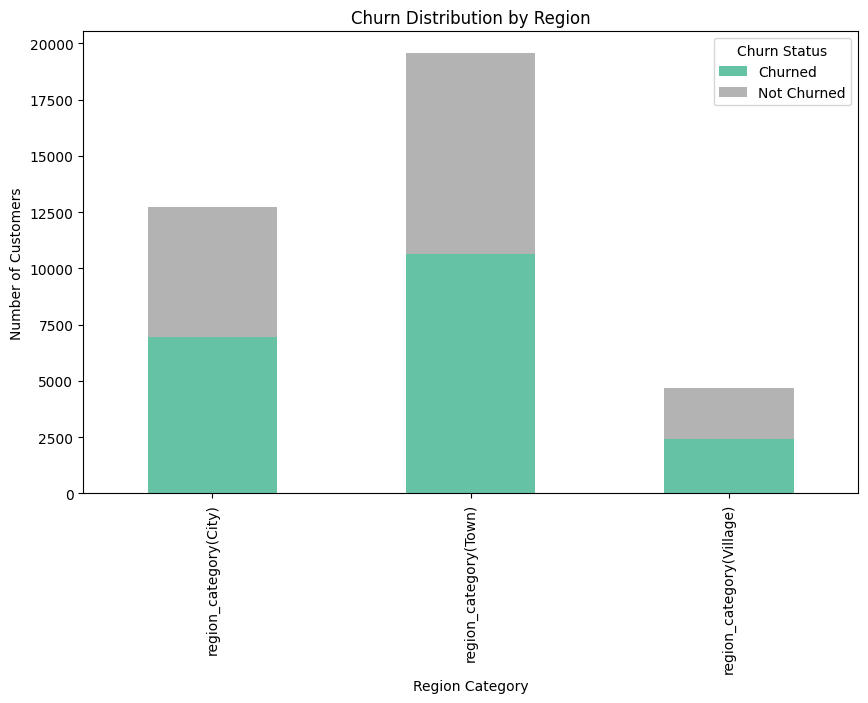

In [9]:
# 6. Churn by Region Category
region_cols = ['region_category(City)', 'region_category(Town)', 'region_category(Village)']
region_churn = engineered_data.groupby(engineered_data['Churn_Label'])[region_cols].sum().T
region_churn.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Churn Distribution by Region')
plt.xlabel('Region Category')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.show()

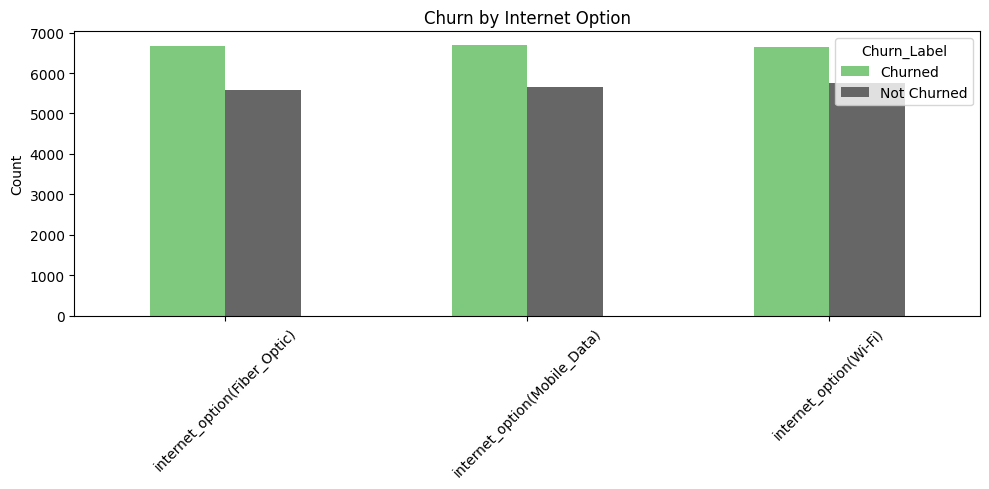

In [10]:
#7.Bar Plot: Churn by Internet Option
internet_cols = [col for col in engineered_data.columns if col.startswith('internet_option(') and not col.endswith('_log')]
internet_churn = engineered_data.groupby('Churn_Label')[internet_cols].sum().T
internet_churn.plot(kind='bar', figsize=(10,5), colormap='Accent')
plt.title('Churn by Internet Option')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

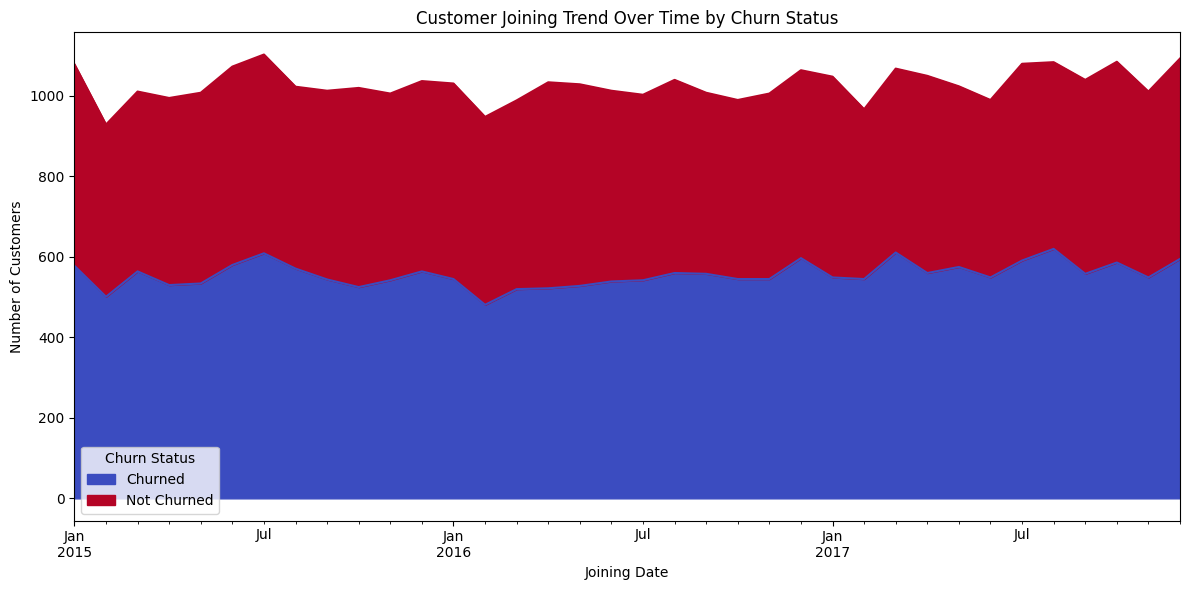

In [11]:

#8. Stacked Area Plot Over Time (Joining Date vs Churn)
# Ensure joining_date is in datetime format
engineered_data['joining_date'] = pd.to_datetime(engineered_data['joining_date'])
# Group by month and churn label
time_churn = engineered_data.groupby([pd.Grouper(key='joining_date', freq='M'), 'Churn_Label']).size().unstack(fill_value=0)
# Plot
time_churn.plot(kind='area', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Customer Joining Trend Over Time by Churn Status')
plt.xlabel('Joining Date')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()